# Analyzing Nobel Prize Winner Data
Given the nobel.csv dataset calculate the following:
1. Which gender and country has had the most winners?
2. Which decade had the most American-born winners?
3. Which decade and category have had the most female winners?
4. Who was the first female winner and in what category?
5. Which individuals and organizations have won multiple nobel prizes?

In [24]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load data and get Top Gender and Country
df_nobel = pd.read_csv("nobel.csv")
# print(df_nobel.head())
top_gender = df_nobel.value_counts("sex").index[0]
top_country = df_nobel.value_counts("birth_country").index[0]
print("Gender with the most wins: " + top_gender)
print("Country with the most wins: " + top_country)

Top Gender: Male
Top Birth Country: United States of America


C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


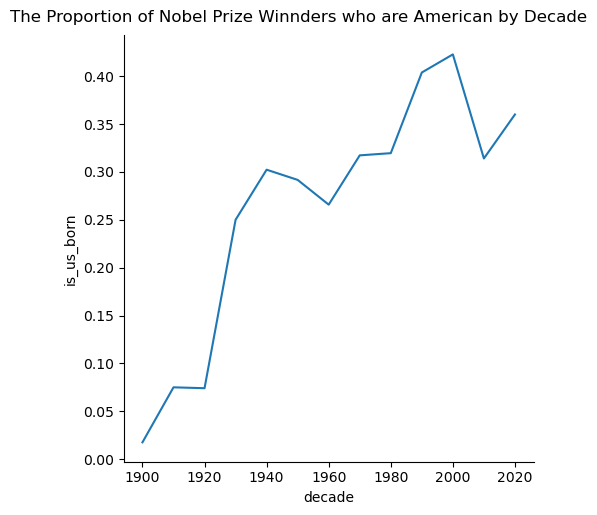

The decade with the most American winnders is 2000


In [28]:
# Get which Decade had the most American-born winners
df_nobel["is_us_born"]=df_nobel["birth_country"] == "United States of America"
df_nobel["decade"]=(np.floor(df_nobel["year"]/10) *10).astype(int)
df_prop = df_nobel.groupby("decade", as_index=False)["is_us_born"].mean()
max_prop = df_prop["is_us_born"].max()
max_decade_usa = df_prop.loc[df_prop["is_us_born"] == max_prop]["decade"].values[0]

g = sns.relplot(x="decade",y="is_us_born", data=df_prop, kind="line")
g.fig.suptitle("The Proportion of Nobel Prize Winnders who are American by Decade", y=1.02)
plt.show()
print("The decade with the most American winnders is " + str(max_decade_usa))

C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


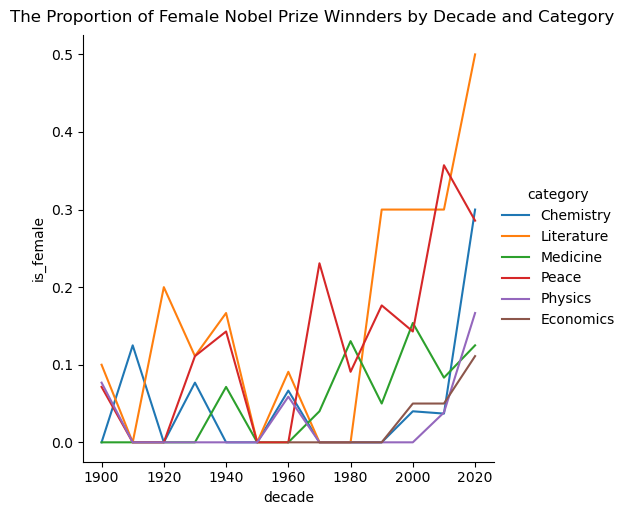

The decade and category pair that has the highest proportion of female laureates is: {2020: 'Literature'}


In [29]:
# Which Decade and Category has the most female winnders
df_nobel["is_female"]=df_nobel["sex"] == "Female"
df_nobel["decade"]=(np.floor(df_nobel["year"]/10) *10).astype(int)

df_prop = df_nobel.groupby(["decade","category"], as_index=False)["is_female"].mean()
max_prop = df_prop["is_female"].max()
max_decade_female = df_prop.loc[df_prop["is_female"] == max_prop]["decade"].values[0]
max_category_female = df_prop.loc[df_prop["is_female"] == max_prop]["category"].values[0]
max_female_dict = {max_decade_female:max_category_female}

g = sns.relplot(x="decade",y="is_female", data=df_prop, kind="line", hue="category")
g.fig.suptitle("The Proportion of Female Nobel Prize Winnders by Decade and Category", y=1.02)
plt.show()

print("The decade and category pair that has the highest proportion of female laureates is: " + str(max_female_dict))

In [30]:
# Find the first woman to receive a nobel prize and which category
df_women=df_nobel[df_nobel["is_female"] == True]
first_year = df_women[df_women["year"] == df_women["year"].min()]
first_woman_name=first_year["full_name"].values[0]
first_woman_category=first_year["category"].values[0]
print("The first woman to receive a nobel prize was " + first_woman_name + " for " + first_woman_category)

The first woman to receive a nobel prize was Marie Curie, née Sklodowska for Physics


In [31]:
# Determine which individuals and organizations have won multiple Nobel Prizes
counts = df_nobel["full_name"].value_counts()
filter_counts = counts[counts >= 2].index
repeat_list = list(filter_counts)

print("Repeat Winners: " + str(repeat_list))

Repeat Winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
